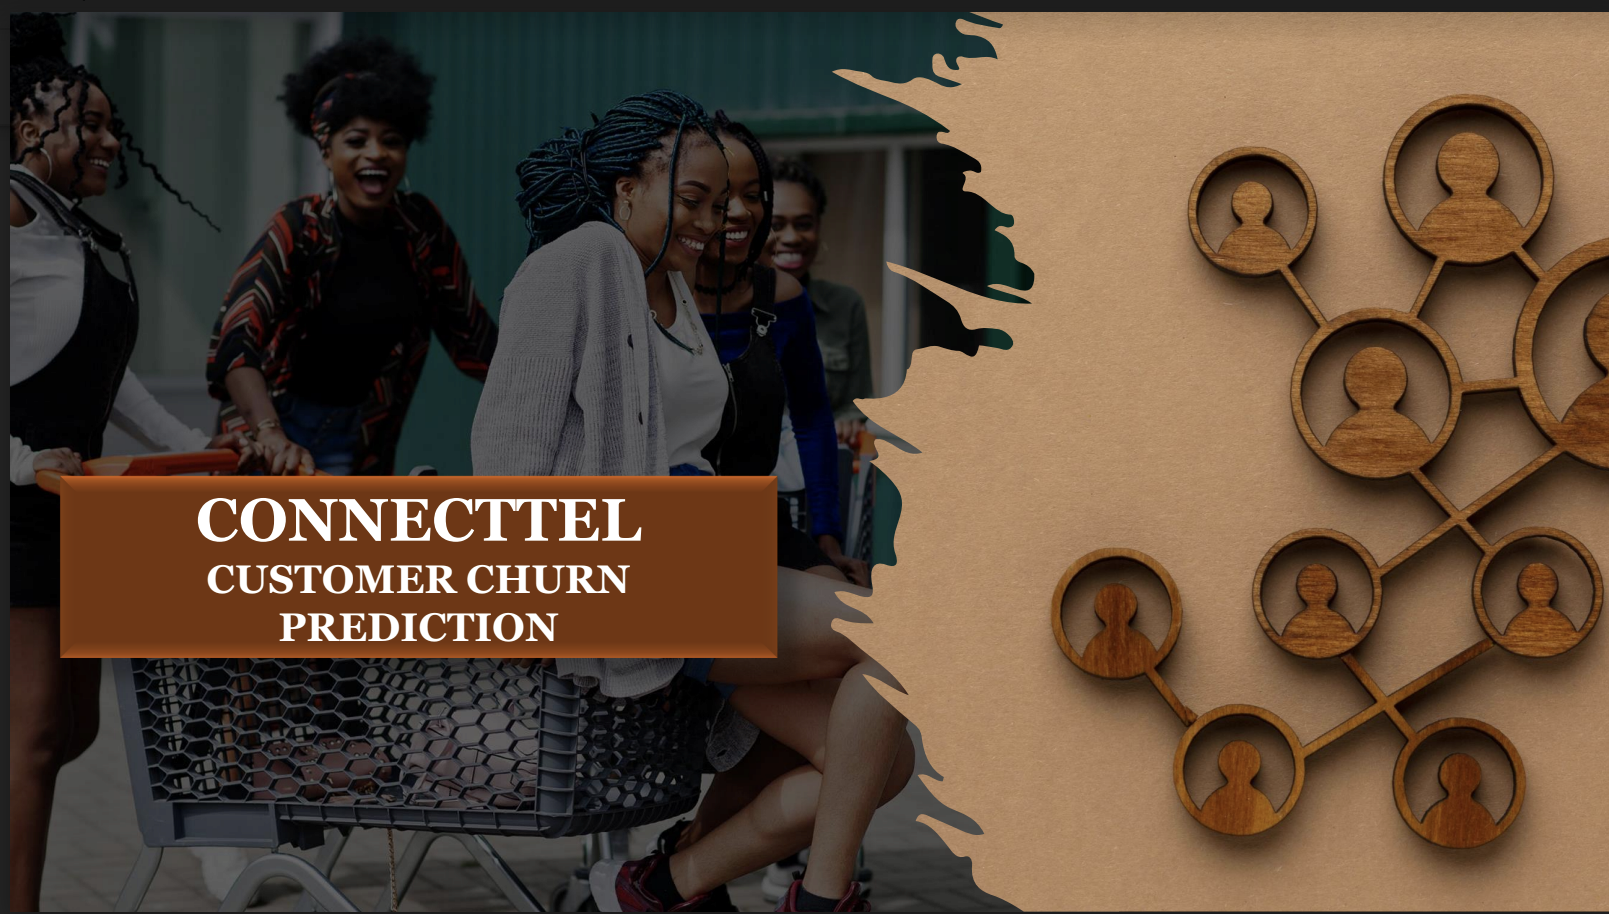

# CONNECTTEL CUSTOMER CHURN PREDICTION

# Problem Overview

ConnectTel Telecom is facing a significant challenge as customers are leaving, posing a threat to its long-term success. Current retention strategies have proven ineffective, resulting in the loss of valuable customers to competitors. In response, ConnectTel aims to implement a data-driven solution, utilizing advanced analytics and machine learning to predict customer churn and execute targeted retention initiatives. The objective is to enhance customer loyalty and maintain competitiveness in the telecommunications industry.


# Import Necessary Libraries

In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
# Load Data
df = pd.read_csv('/Users/mac/Desktop/customer-churn.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [3]:
# Loads the first five rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Loads the last five rows

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Getting the shape of the dataset

df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Provides a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking for Descriptive statistics of numeric values

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


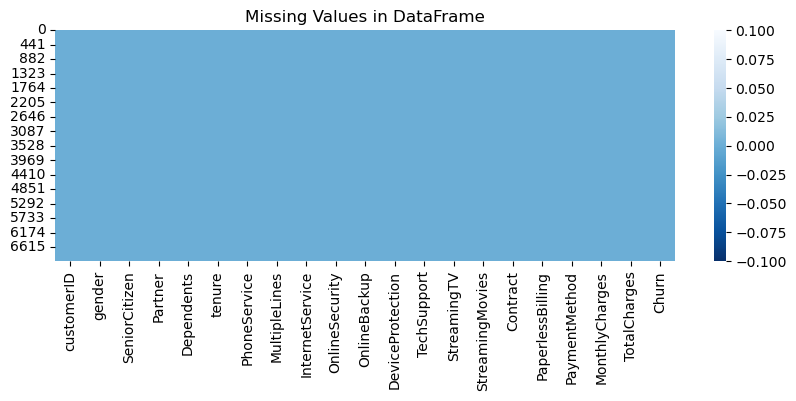

In [9]:
# Check For Missing Values
df.isnull().sum()
      
# Visualizing the Missing Data
plt.figure(figsize=(10, 3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r" )
plt.title('Missing Values in DataFrame');

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Upon reviewing missing values, we found no null entries in the dataset. However, TotalCharges was identified as an object instead of a numeric variable, representing the total amount charged to customers. To correct this, we'll convert this column to a numeric data type using the pd.to_numeric function. Using errors='coerce' will replace non-numeric entries with NaN values.

In [11]:
# Drop the 'customerID' column from the DataFrame because it's not needed for our analysis

df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Convert 'TotalCharges' to numeric, coercing errors, and check for missing values

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# Displaying rows where 'TotalCharges' is NaN after numeric conversion

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### We can observe that the 'Tenure' column is 0 for these entries, even though the 'MonthlyCharges' column is not empty. This information is unclear so we will remove it from the dataset.

In [14]:
# Dropping the rows with missing values

df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

### We've removed the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [15]:
# To solve the problem of missing values in TotalCharges column, I fill it with the mean of TotalCharges values.

df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Handling Missing Values

To address missing values in the dataset, particularly in the 'TotalCharges' column, We will fill these gaps with the mean value of the 'TotalCharges' column. This approach was taken to maintain data integrity and prevent any significant impact on subsequent analyses.

By filling missing values with the mean, we aimed to provide a reasonable estimation of 'TotalCharges' for instances where the original data was absent. This method ensures a smooth flow in the dataset, crucial for tasks like exploratory data analysis and machine learning model training.

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Counts of customers who did not churn by gender


df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [18]:
# Counts of customers who churned by gender

df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

## Exploratory Data Analysis

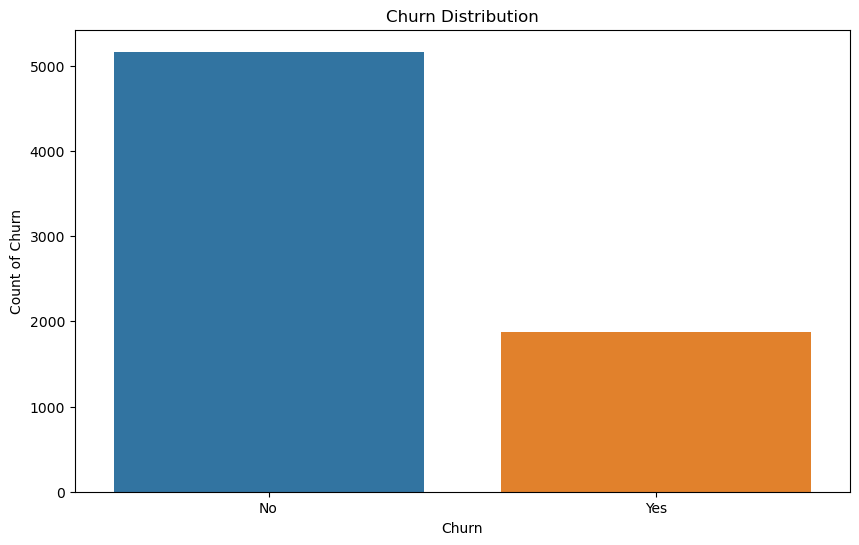

Count of Churn:
No     5163
Yes    1869
Name: Churn, dtype: int64


In [19]:
# Visualizing Churn

plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn')
plt.ylabel('Count of Churn')
plt.title('Churn Distribution')
plt.show()

churn_count = df['Churn'].value_counts()
print("Count of Churn:")
print(churn_count)

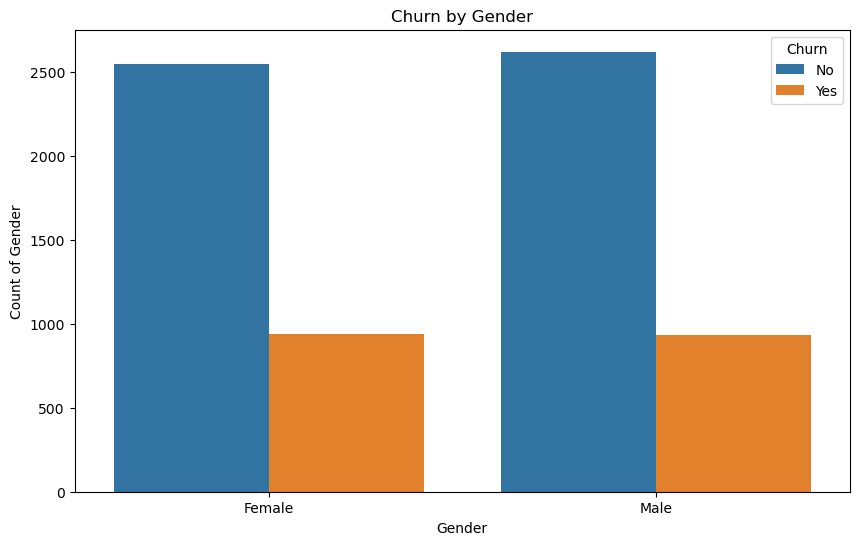

In [20]:
# Visualizing Churn with Gender

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Churn by Gender')
plt.show()

### The gender distribution is nearly balanced for Male and Female.  Regarding churn, Some of the customers switched to another firm.

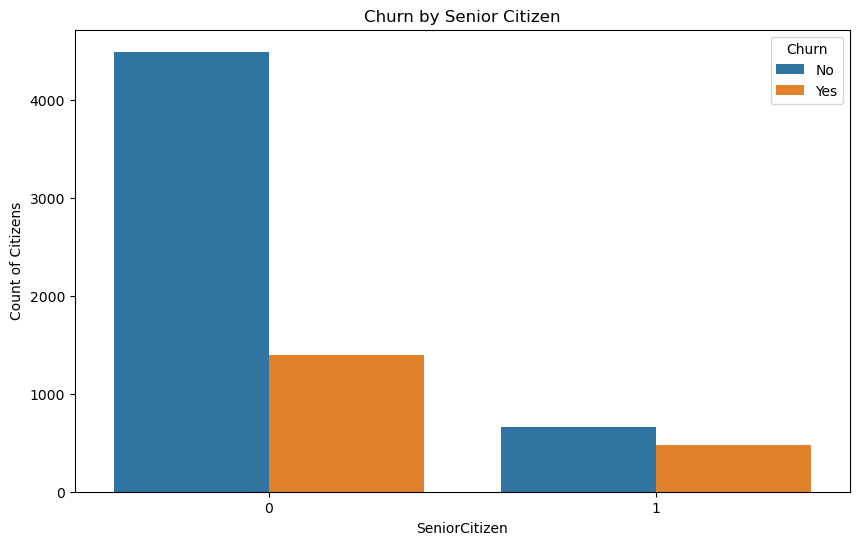

In [21]:
# Visualizing Churn for Senior Citizen

# plots
fig, ax = plt.subplots(figsize=(10, 6))

# Visualize Churn with SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.set_title('Churn by Senior Citizen')
ax.set_ylabel('Count of Citizens')
plt.show()

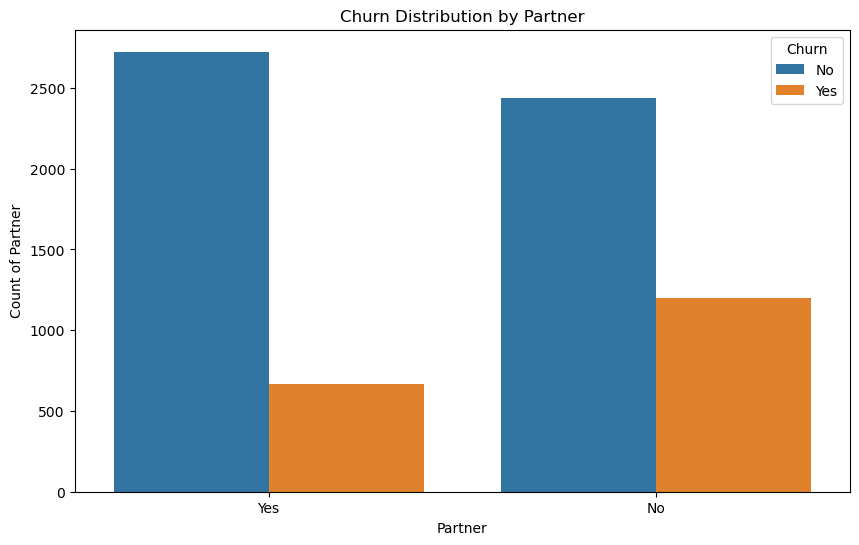

In [22]:
# Visualizing Churn for Partner

# plots
fig, ax = plt.subplots(figsize=(10, 6))

# Visualize Churn with Partner
sns.countplot(x='Partner', hue='Churn', data=df)
ax.set_title('Churn Distribution by Partner')
ax.set_ylabel('Count of Partner')
plt.show()

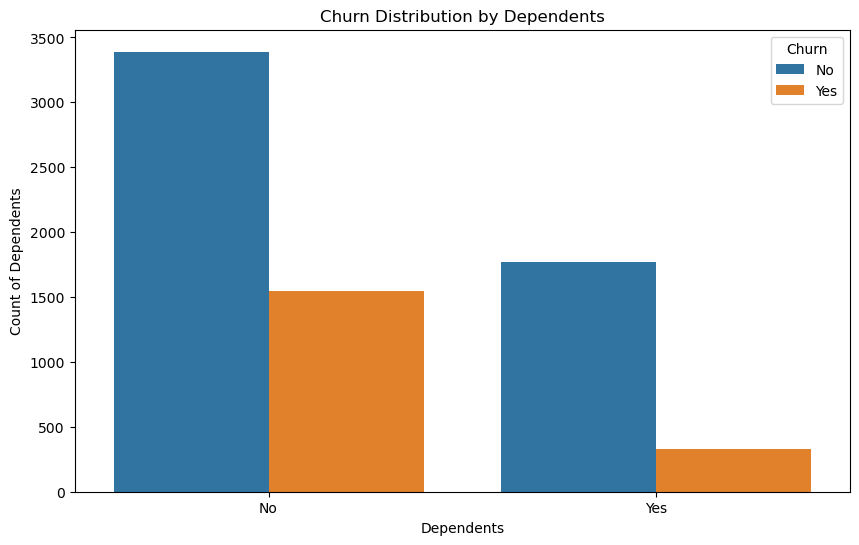

In [23]:
# Visualizing Churn for Dependents

# Plots
fig, ax = plt.subplots(figsize=(10, 6))

# Visualize Churn with Dependents
sns.countplot(x='Dependents', hue='Churn', data=df)
ax.set_title('Churn Distribution by Dependents')
ax.set_ylabel('Count of Dependents')
plt.show()

### The rate of churn among senior citizens is nearly twice as high as that observed among younger citizens.  Individuals with a partner exhibit lower churn rates compared to those without a partner. Customers without dependents are more likely to churn

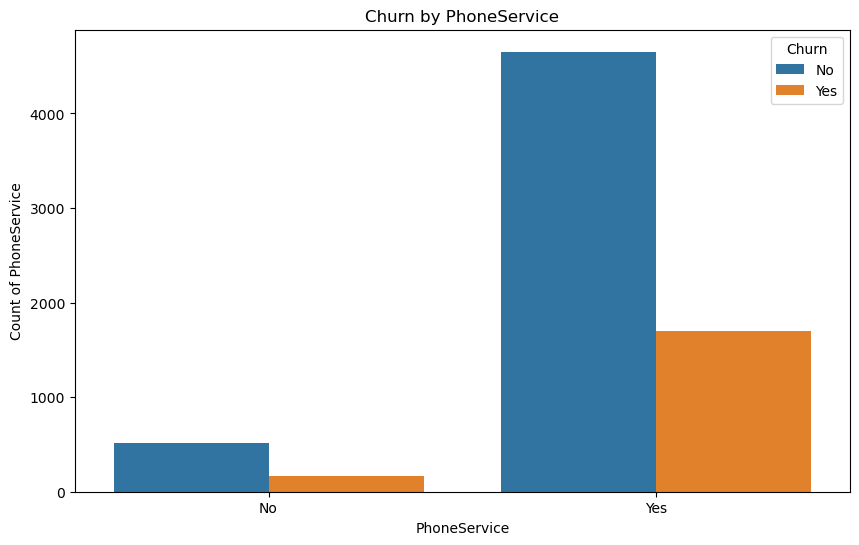

In [24]:
# Visualizing Churn by PhoneService

plt.figure(figsize=(10, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.xlabel('PhoneService')
plt.ylabel('Count of PhoneService')
plt.title('Churn by PhoneService')
plt.show()

### A very small number of customers do not have a phone service, and among them, a significant portion is more likely to leave or stop using our service.

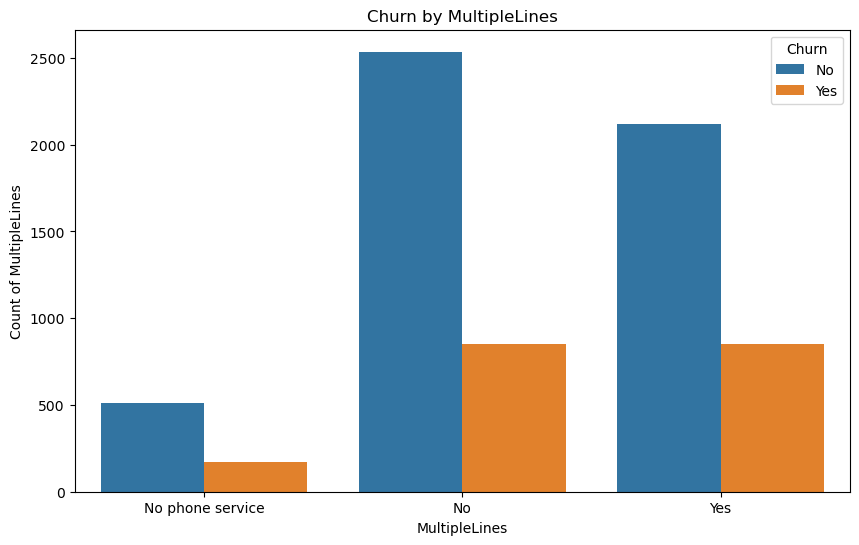

In [25]:
# Visualizing Churn with multiple lines

plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.xlabel('MultipleLines')
plt.ylabel('Count of MultipleLines')
plt.title('Churn by MultipleLines')
plt.show()

In [26]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

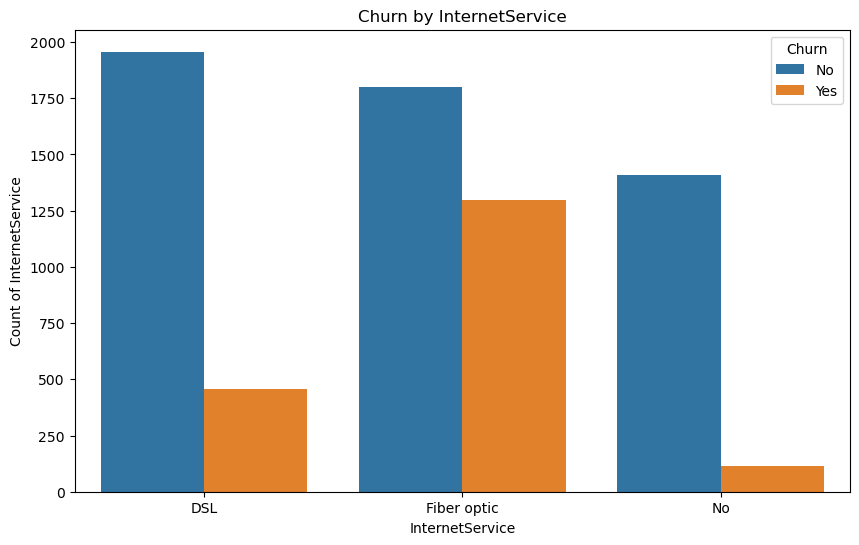

In [27]:
# Visualizing Churn by InternetService

plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.xlabel('InternetService')
plt.ylabel('Count of InternetService')
plt.title('Churn by InternetService')
plt.show()

### Many customers choose for Fiber optic internet service. However, it's noticeable that customers using Fiber optic have a higher churn rate, indicating potential dissatisfaction with this type of internet service. In contrast, customers with DSL service are more numerous and show a lower churn rate compared to Fiber optic service.

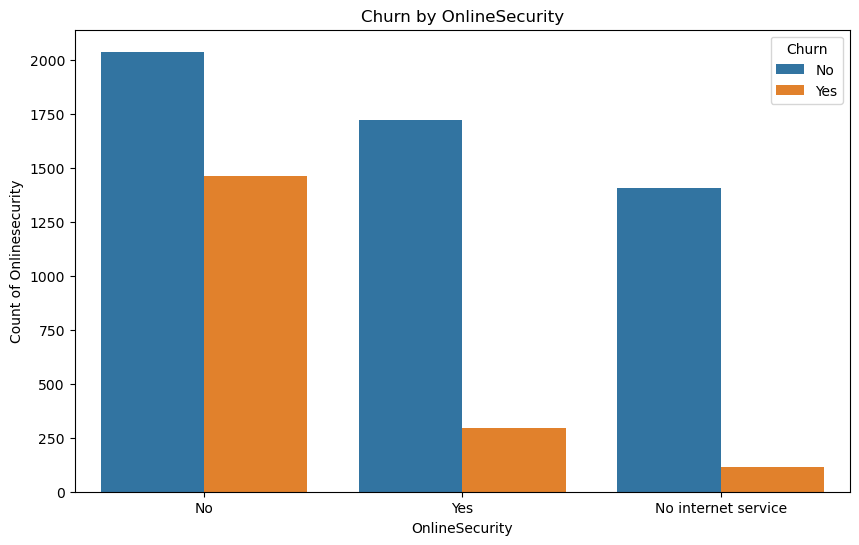

In [28]:
# Visualizing Churn by OnlineSecurity

plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.xlabel('OnlineSecurity')
plt.ylabel('Count of Onlinesecurity')
plt.title('Churn by OnlineSecurity')
plt.show()


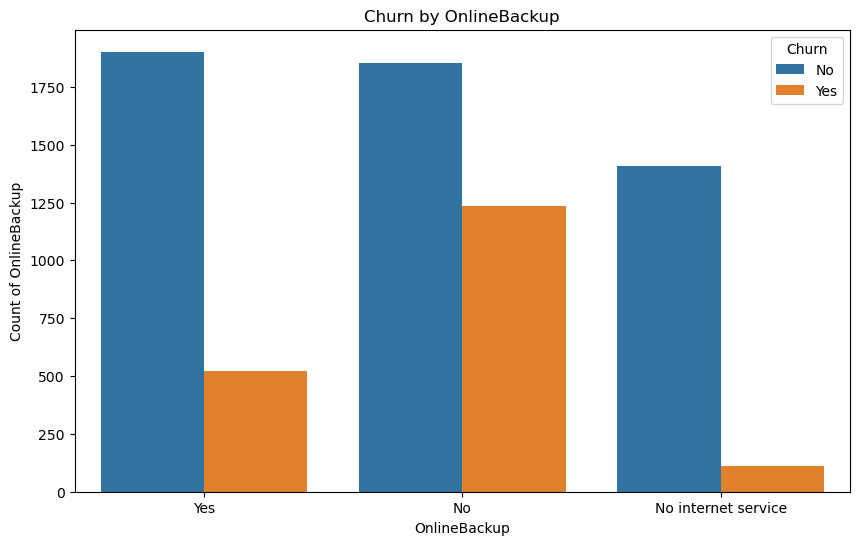

In [29]:
# Visualizing Churn by OnlineBackup

plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.xlabel('OnlineBackup')
plt.ylabel('Count of OnlineBackup')
plt.title('Churn by OnlineBackup')
plt.show()

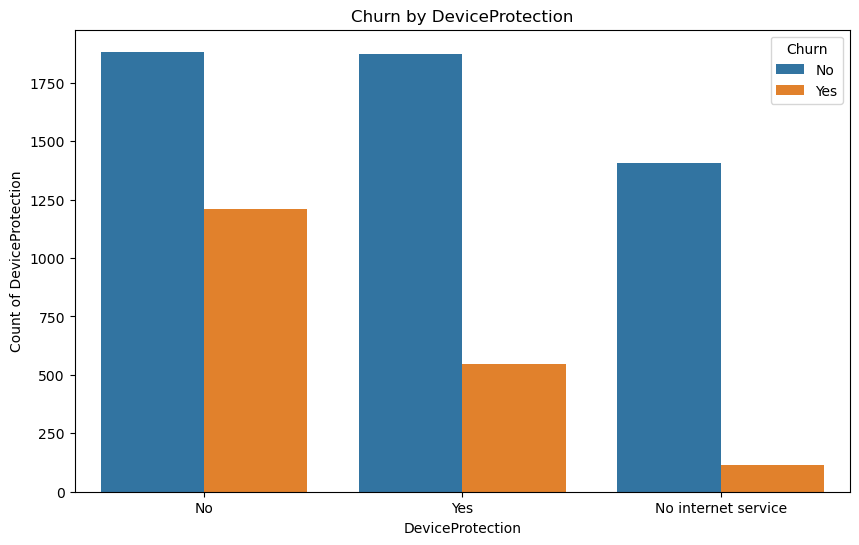

In [30]:
# Visualizing Churn by DeviceProtection

plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.xlabel('DeviceProtection')
plt.ylabel('Count of DeviceProtection')
plt.title('Churn by DeviceProtection')
plt.show()

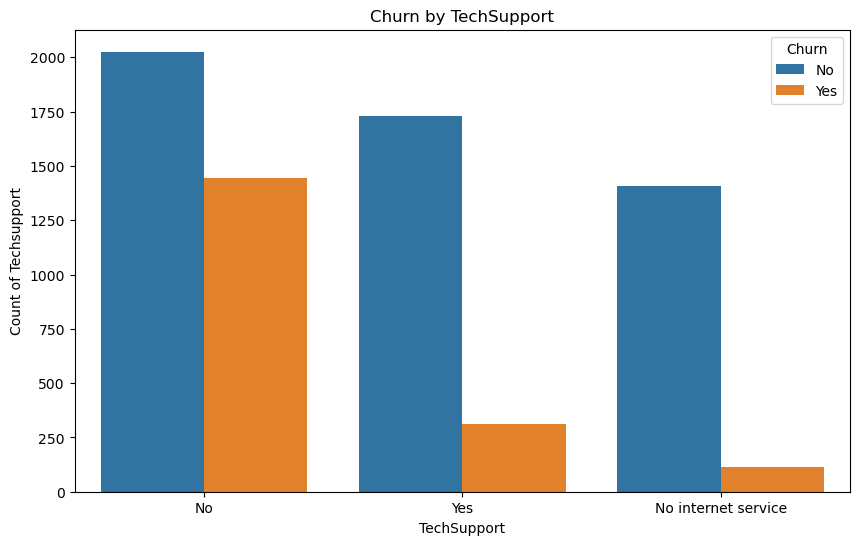

In [31]:
# Visualizing Churn by TechSupport

plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.xlabel('TechSupport')
plt.ylabel('Count of Techsupport')
plt.title('Churn by TechSupport')
plt.show()

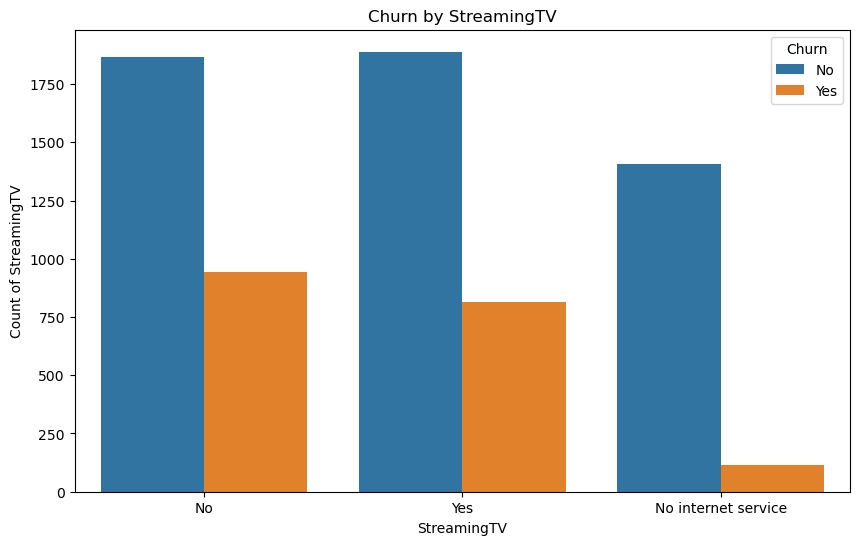

In [32]:
# Visualizing Churn by StreamingTV

plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.xlabel('StreamingTV')
plt.ylabel('Count of StreamingTV')
plt.title('Churn by StreamingTV')
plt.show()

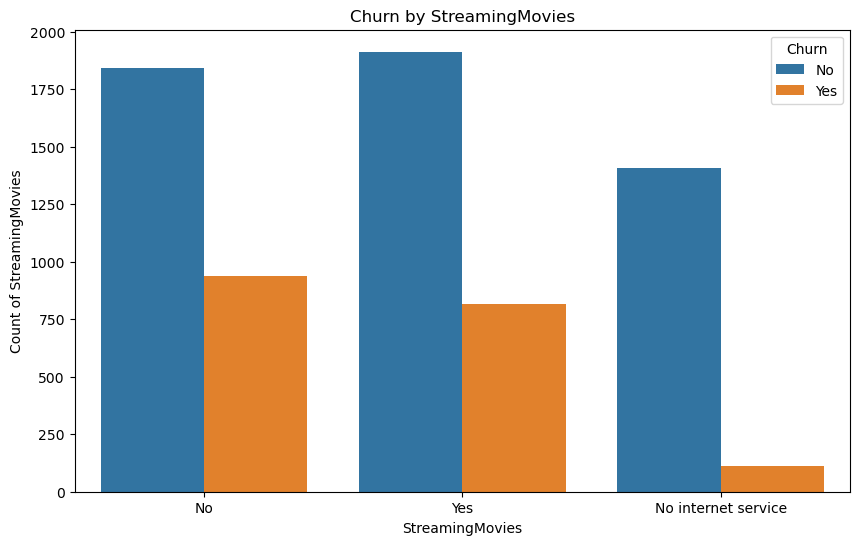

In [33]:
# Visualizing Churn by StreamingMovies

plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.xlabel('StreamingMovies')
plt.ylabel('Count of StreamingMovies')
plt.title('Churn by StreamingMovies')
plt.show()

### Customers who don't have TechSupport are more likely to switch to another service provider. Customers who choose Paperless Billing are more likely to churn. The majority of customers tend to churn when they don't have online security services.

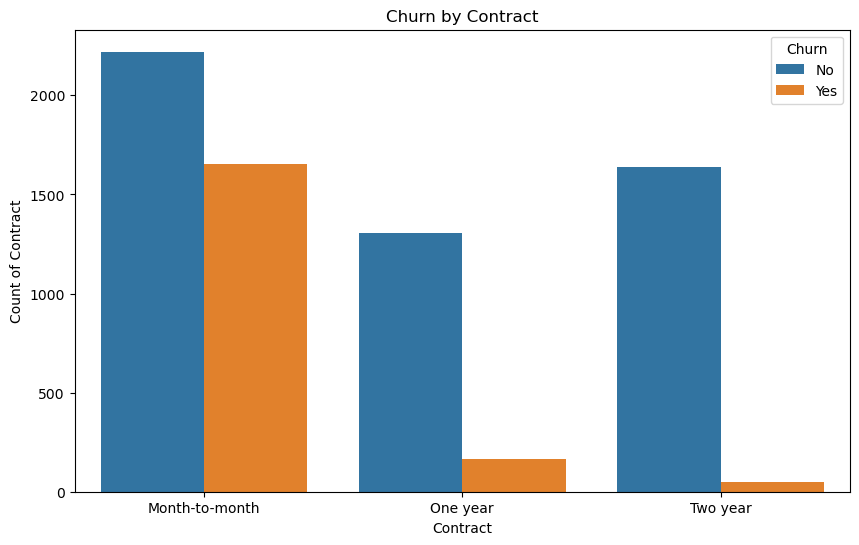

In [34]:
# Visualizing Churn by Contract

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Churn by Contract')
plt.show()

### Large amount of customer with Month-to-Month Contract opted to move out as compared to customrs with One Year Contract and few with Two Year Contract

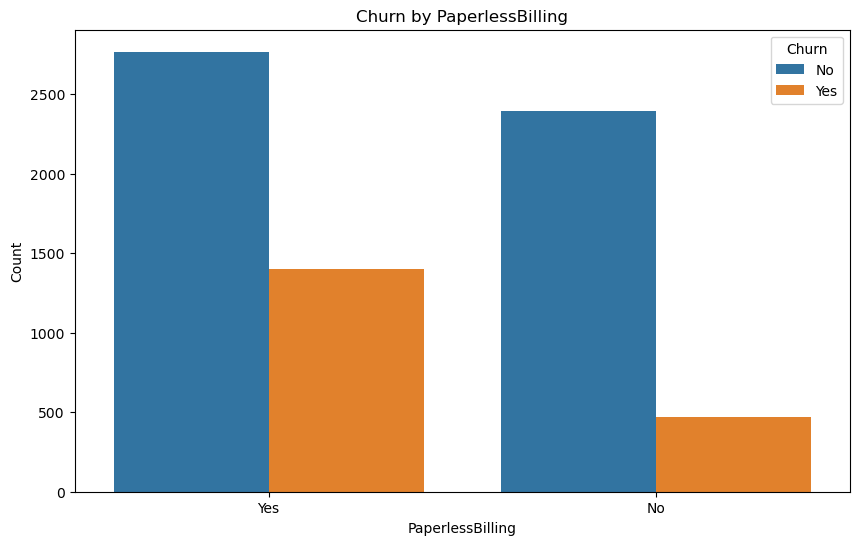

In [35]:
# Visualizing Churn by PaperlessBilling

plt.figure(figsize=(10, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('Churn by PaperlessBilling')
plt.show()

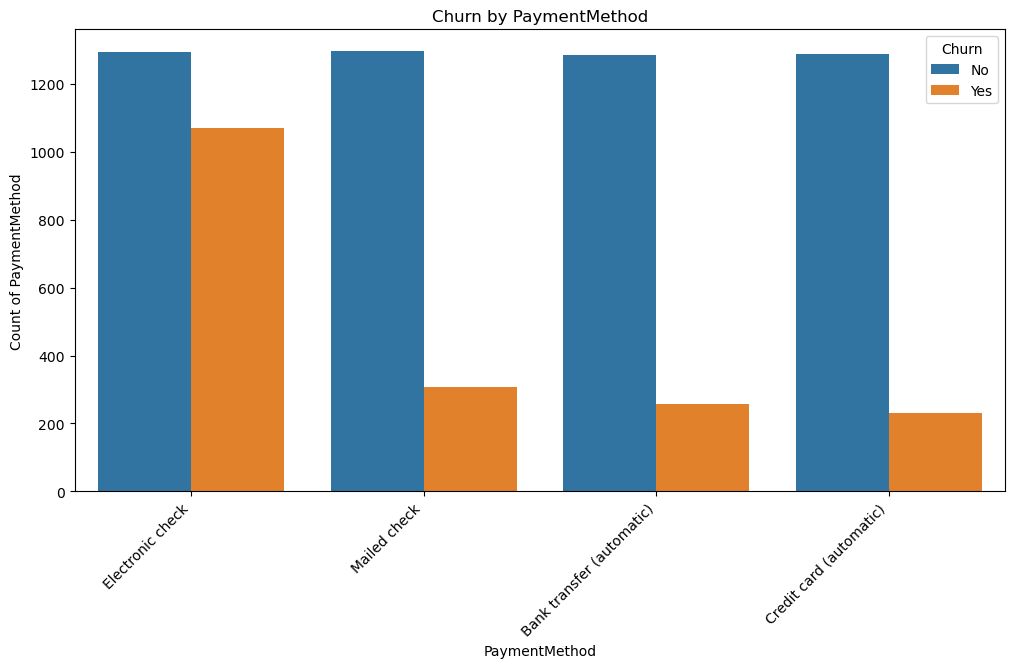

In [36]:
# Visualizing Churn by PaymentMethod

plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xlabel('PaymentMethod')
plt.ylabel('Count of PaymentMethod')
plt.title('Churn by PaymentMethod')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### The main group of customers who decided to leave were those who used Electronic Check as their payment method. On the other hand, customers who chose Credit-Card automatic transfer, Bank Automatic Transfer, or Mailed Check as their payment method were less likely to move out or switch to another service.

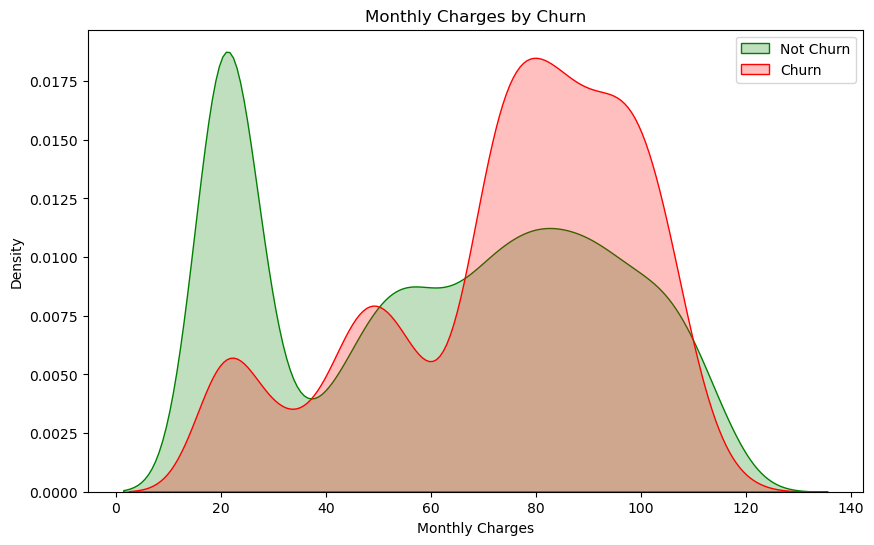

In [37]:
# Visualizing Monthly Charges by Churn 

plt.figure(figsize=(10, 6))

# Monthly Charges by Churn
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="Green", shade=True, label="Not Churn")
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], color="Red", shade=True, label="Churn")
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
plt.legend()
plt.show()


### Customers with higher monthly charges are more likely to Churn.

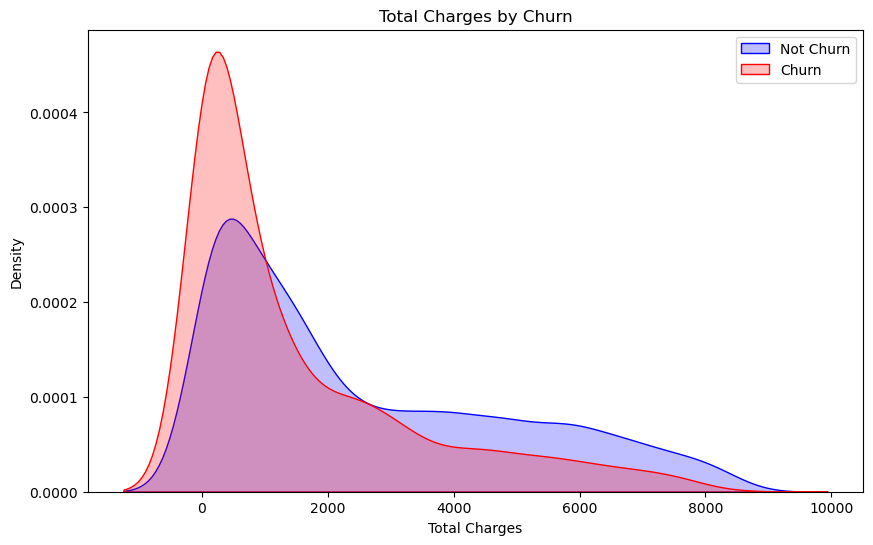

In [38]:
# Visualizing Total Charges by Churn

plt.figure(figsize=(10, 6))

# Total Charges by Churn
sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], color="Blue", shade=True, label="Not Churn")
sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], color="Red", shade=True, label="Churn")
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total Charges by Churn')
plt.legend()
plt.show()


### Customers with high total charges are less likely to leave the company.

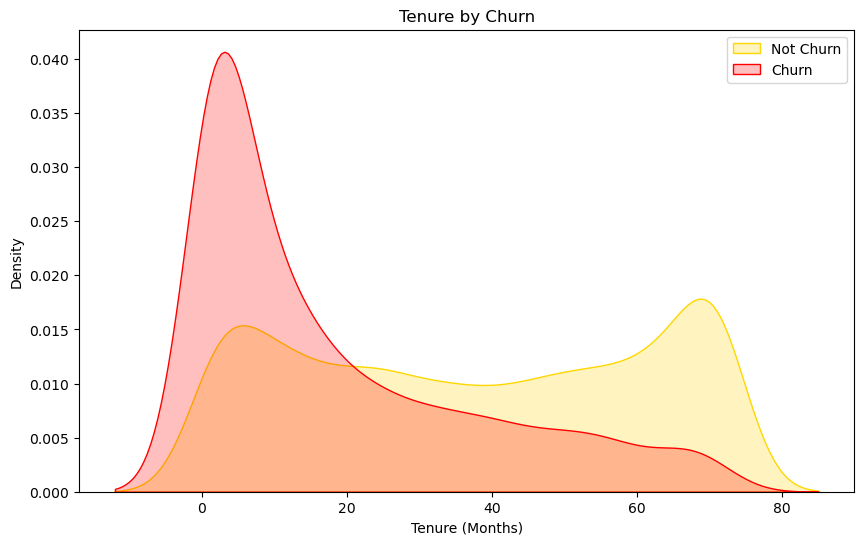

In [39]:
# Visualizing Tenue by Churn

plt.figure(figsize=(10, 6))

# Tenure by Churn
sns.kdeplot(df.tenure[df["Churn"] == 'No'], color="Gold", shade=True, label="Not Churn")
sns.kdeplot(df.tenure[df["Churn"] == 'Yes'], color="Red", shade=True, label="Churn")
plt.ylabel('Density')
plt.xlabel('Tenure (Months)')
plt.title('Tenure by Churn')
plt.legend()
plt.show()


### New customers (low tenure) are more likely to churn.

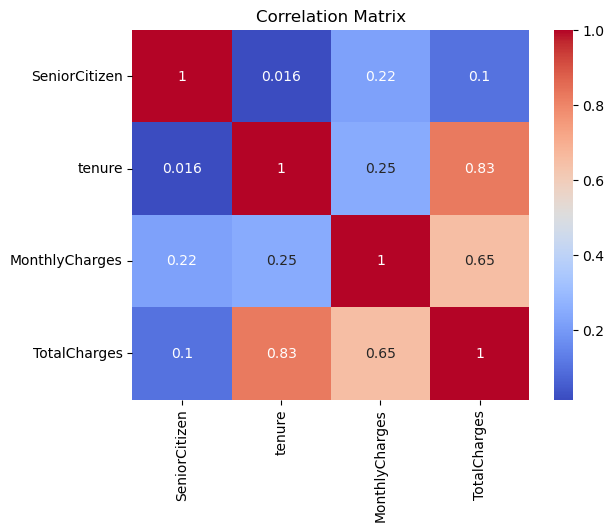

In [40]:
# Correlation matrix

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix',)
plt.show()

### In the heatmap, we noticed a strong connection (0.83) between TotalCharges and tenure. Moreover, there's a solid correlation (0.65) between TotalCharges and MonthlyCharges.


## Feature Engineering/Data Preprocessing

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

### Observations on Correlation with Churn

- Higher MonthlyCharges and PaperlessBilling are positively correlated with Churn.
- SeniorCitizen and certain PaymentMethods show positive correlations with Churn.
- MultipleLines and PhoneService have weak positive correlations with Churn.
- Gender, StreamingTV, StreamingMovies, InternetService, and Partner have weak negative correlations with Churn.
- TotalCharges, TechSupport, OnlineSecurity, tenure, and Contract show moderate negative correlations with Churn.
- Longer tenure, higher total charges, and specific services (tech support, online security) are associated with lower churn.
- Longer-term contracts are also associated with lower churn.

## Machine Learning

### Splitting the data in training and testing sets

In [44]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4922, 19)
X_test shape: (2110, 19)
y_train shape: (4922,)
y_test shape: (2110,)


In [46]:
#importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
#instantiate models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
gb_clf = GradientBoostingClassifier()
svc = SVC() 
rand_forest = RandomForestClassifier() 

In [48]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")

Logistic Regression Accuracy: 0.7895734597156399


In [49]:
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



In [50]:
# Train Decision Tree
dec_tree.fit(X_train, y_train)
dec_tree_predictions = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, dec_tree_predictions)
print(f"Decision Tree Accuracy: {dec_tree_accuracy}")

Decision Tree Accuracy: 0.7355450236966825


In [51]:
print(classification_report(y_test, dec_tree_predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.74      2110
   macro avg       0.66      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



In [52]:
# Train Gradient Boosting Classifier
gb_clf.fit(X_train, y_train)
gb_clf_predictions = gb_clf.predict(X_test)
gb_clf_accuracy = accuracy_score(y_test, gb_clf_predictions)
print(f"Gradient Boosting Classifier Accuracy: {gb_clf_accuracy}")

Gradient Boosting Classifier Accuracy: 0.795260663507109


In [53]:
print(classification_report(y_test, gb_clf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.80      0.79      2110



In [54]:
# Train Random Forest

rand_forest.fit(X_train, y_train)
rand_forest_predictions = rand_forest.predict(X_test)
rand_forest_accuracy = accuracy_score(y_test, rand_forest_predictions)
print(f"Random Forest Accuracy: {rand_forest_accuracy}")


Random Forest Accuracy: 0.7843601895734598


In [55]:
print(classification_report(y_test, rand_forest_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



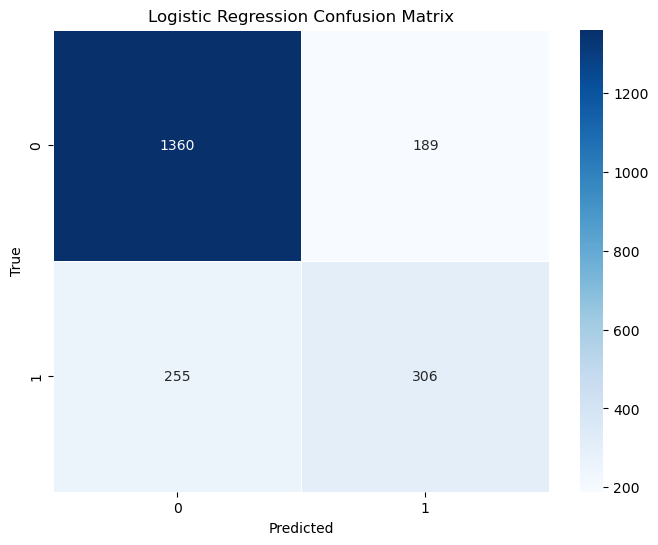

In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, log_reg_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


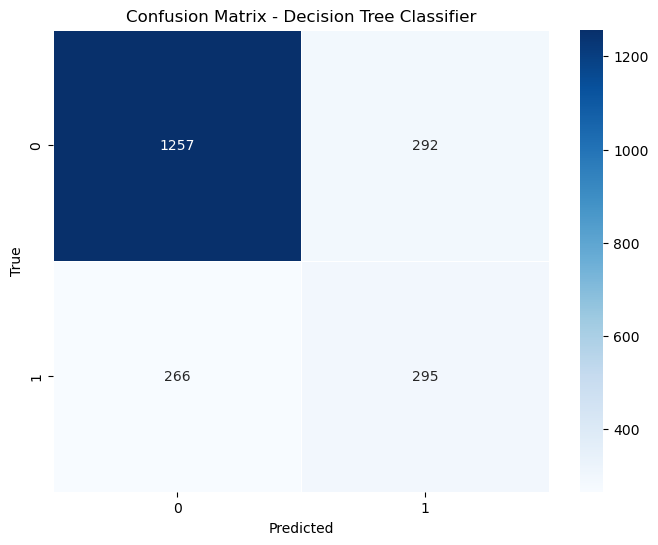

In [57]:
# Confusion matrix for Decision Tree Classifier
dec_tree_cm = confusion_matrix(y_test, dec_tree_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dec_tree_cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


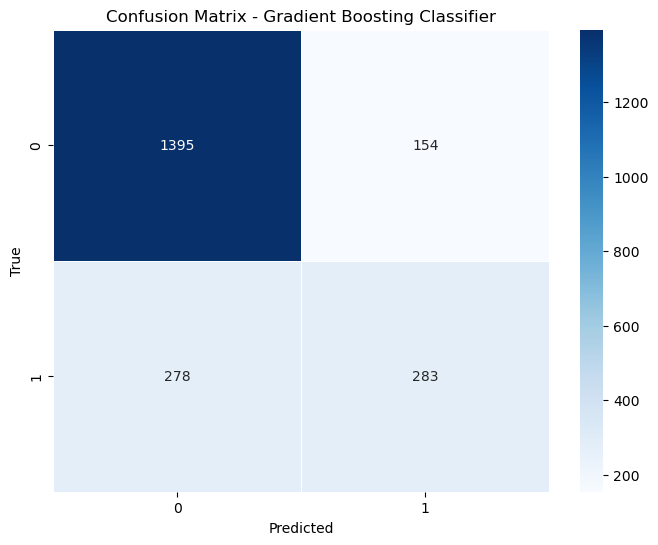

In [58]:
# Confusion matrix for Gradient Boosting Classifier
gb_clf_cm = confusion_matrix(y_test, gb_clf_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_clf_cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


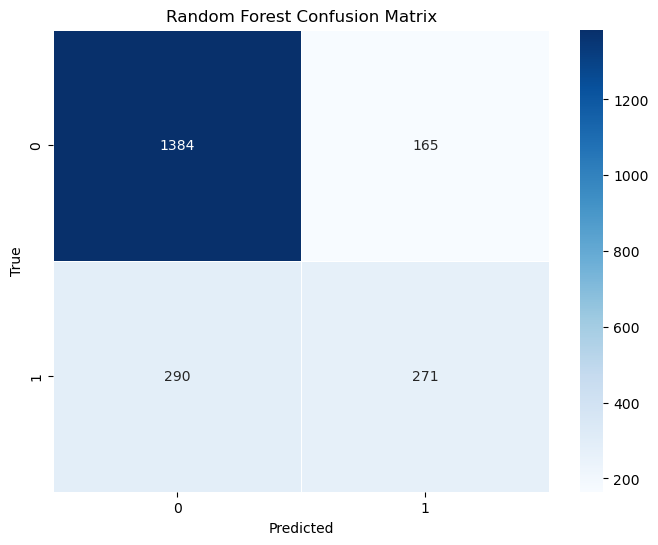

In [59]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rand_forest_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Trained Model Performance:

### Logistic Regression
- **Accuracy:** 78.96%
- **Precision (Class 1):** 62%
- **Recall (Class 1):** 55%
- **F1-Score (Class 1):** 58%

### Decision Tree
- **Accuracy:** 73.74%
- **Precision (Class 1):** 51%
- **Recall (Class 1):** 51%
- **F1-Score (Class 1):** 51%

### Gradient Boosting Classifier
- **Accuracy:** 79.53%
- **Precision (Class 1):** 65%
- **Recall (Class 1):** 50%
- **F1-Score (Class 1):** 57%

### Random Forest
- **Accuracy:** 78.34%
- **Precision (Class 1):** 62%
- **Recall (Class 1):** 48%
- **F1-Score (Class 1):** 54%

## Insights

- The Gradient Boosting Classifier achieved the highest accuracy among the models.
- Precision and recall metrics bring attention to the balance between minimizing incorrect positive predictions and capturing all positive instances.
- When analyzing these results, take into account the unique business context and priorities to derive meaningful insights.
- Further exploration of feature importance in the Gradient Boosting model may provide insights.

# Recommendations:

- The Gradient Boosting Classifier appears to be the best choice for customer churn prediction among the models. Minimizing customer churn is crucial for a firm's profitability. To achieve this, understanding and identifying at-risk customers are key. Prioritizing customer service improvement and building loyalty through personalized experiences are effective strategies. Proactive measures, such as surveying departed customers, help prevent future churn.